In [1]:
!nvidia-smi

Mon Jun  5 21:05:07 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.29                 Driver Version: 531.29       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650 Ti    WDDM | 00000000:01:00.0 Off |                  N/A |
| N/A   43C    P8                3W /  N/A|      0MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')
tf.test.is_built_with_cuda()

True

# Preparing the data

In [5]:
import numpy
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [48]:
# initialize data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255, 
                                    validation_split = 0.2,
                                    rotation_range=5,width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    fill_mode='nearest'
                                   )
validation_data_gen = ImageDataGenerator(rescale=1./255,
                                         validation_split=0.2
                                        )

test_data_gen = ImageDataGenerator(rescale=1./255,
                                         validation_split=0.2
                                        )

In [7]:
# Preprocessing all test data
train_generator = train_data_gen.flow_from_directory(
    '../data/train',
    target_size = (48,48),
    batch_size = 64,
    subset='training',
    class_mode = 'categorical'
# )

    ,color_mode = "grayscale")

Found 22968 images belonging to 7 classes.


In [8]:
# Preprocess all training images
validation_generator = validation_data_gen.flow_from_directory(
    '../data/test',
    target_size = (48,48), # setting input shape to 48,48
    batch_size = 64, 
    subset = 'validation',
    color_mode = "grayscale", # setting color as 1 (grayscale)
    class_mode = 'categorical')

Found 1432 images belonging to 7 classes.


# Model 1

In [ ]:
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3,3), activation= 'relu', input_shape=(48,48,1))) #input_shape: 48,48 & grayscale
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25)) # to avoid overfitting

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25)) #to avoid overfitting

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))
# in the final dense layer, the 7 outputs are the 7 categories, outputted with softmax

In [11]:
emotion_model.compile(loss = 'categorical_crossentropy', optimizer=Adam(learning_rate=10e-5, decay=1e-6), metrics=['accuracy'])

In [12]:
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [13]:
# Train the neural network/model
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

C:\Users\dhruv\AppData\Local\Temp\ipykernel_17884\3198193097.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(


Epoch 1/50
448/448 [==============================] - 253s 537ms/step - loss: 1.7998 - accuracy: 0.2615 - val_loss: 1.6872 - val_accuracy: 0.3467
Epoch 2/50
448/448 [==============================] - 242s 541ms/step - loss: 1.6095 - accuracy: 0.3731 - val_loss: 1.5242 - val_accuracy: 0.4145
Epoch 3/50
448/448 [==============================] - 105s 234ms/step - loss: 1.5064 - accuracy: 0.4176 - val_loss: 1.4420 - val_accuracy: 0.4474
Epoch 4/50
448/448 [==============================] - 13s 29ms/step - loss: 1.4350 - accuracy: 0.4507 - val_loss: 1.4037 - val_accuracy: 0.4646
Epoch 5/50
448/448 [==============================] - 15s 34ms/step - loss: 1.3730 - accuracy: 0.4778 - val_loss: 1.3434 - val_accuracy: 0.4854
Epoch 6/50
448/448 [==============================] - 12s 27ms/step - loss: 1.3304 - accuracy: 0.4954 - val_loss: 1.3052 - val_accuracy: 0.5045
Epoch 7/50
448/448 [==============================] - 15s 33ms/step - loss: 1.2873 - accuracy: 0.5101 - val_loss: 1.2632 - val_acc

In [66]:
loss = emotion_model_info.history['loss']
val_loss = emotion_model_info.history['val_loss']
acc = emotion_model_info.history['accuracy']
val_acc = emotion_model_info.history['val_accuracy']

# Plot the training and validation loss curves
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy curves
plt.plot(acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

NameError: name 'emotion_model_info' is not defined

In [ ]:
# saving the model
model_json = emotion_model.to_json()

with open("local_emotion_model.json","w") as json_file:
  json_file.write(model_json)


# save trained model weights in .h5 file
emotion_model.save_weights('local_emotion_model.h5')

# Model 2

In [42]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model

In [43]:
# shared parameters
params = {'kernel_size': 3, 'activation':'relu', 'padding':'same'}

# function for convolutional block
def conv_block(x, filters, pool):
    x = Conv2D(filters, **params)(x)
    x = BatchNormalization()(x)
    x = Conv2D(filters, **params)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size = (pool,pool))(x)
    x = Dropout(0.25)(x)
    
    return x 

In [57]:
# Creating a model using the conv_block
visible = Input(shape=(48,48,1), name= 'input')

x = conv_block(visible, 64, 2)

x = conv_block(x, 128, 2)

x = conv_block(x, 256, 2)

x = conv_block(x, 512, 2)

x = conv_block(x, 512, 2)

x = conv_block(x, 1024, 1)

x = conv_block(x, 1024, 1)


# Adding final layer
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(7, activation='softmax')(x)

emoticon_model = Model(inputs=visible, outputs=output)

KerasTensor(type_spec=TensorSpec(shape=(None, 24, 24, 64), dtype=tf.float32, name=None), name='dropout_96/Identity:0', description="created by layer 'dropout_96'")
KerasTensor(type_spec=TensorSpec(shape=(None, 12, 12, 128), dtype=tf.float32, name=None), name='dropout_97/Identity:0', description="created by layer 'dropout_97'")
KerasTensor(type_spec=TensorSpec(shape=(None, 6, 6, 256), dtype=tf.float32, name=None), name='dropout_98/Identity:0', description="created by layer 'dropout_98'")
KerasTensor(type_spec=TensorSpec(shape=(None, 3, 3, 512), dtype=tf.float32, name=None), name='dropout_99/Identity:0', description="created by layer 'dropout_99'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1, 1, 512), dtype=tf.float32, name=None), name='dropout_100/Identity:0', description="created by layer 'dropout_100'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1, 1, 1024), dtype=tf.float32, name=None), name='dropout_101/Identity:0', description="created by layer 'dropout_101'")
KerasTensor(ty

In [58]:
emoticon_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_216 (Conv2D)         (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_153 (Ba  (None, 48, 48, 64)       256       
 tchNormalization)                                               
                                                                 
 conv2d_217 (Conv2D)         (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_154 (Ba  (None, 48, 48, 64)       256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_107 (MaxPooli  (None, 24, 24, 64)       0   

_________________________________________________________________


In [59]:
emoticon_model.compile(loss = 'categorical_crossentropy', optimizer=tf.keras.optimizers.Adamax(learning_rate=2e-3, decay=1e-6), metrics=['accuracy'])

In [62]:
emoticon_model_history = emoticon_model.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64
        )


Epoch 1/50
448/448 [==============================] - 250s 513ms/step - loss: 2.1240 - accuracy: 0.2388 - val_loss: 1.8378 - val_accuracy: 0.2415
Epoch 2/50
448/448 [==============================] - 209s 467ms/step - loss: 1.7300 - accuracy: 0.2968 - val_loss: 1.6396 - val_accuracy: 0.3518
Epoch 3/50
448/448 [==============================] - 77s 173ms/step - loss: 1.5797 - accuracy: 0.3836 - val_loss: 1.4684 - val_accuracy: 0.4212
Epoch 4/50
448/448 [==============================] - 78s 174ms/step - loss: 1.4528 - accuracy: 0.4403 - val_loss: 1.6012 - val_accuracy: 0.4651
Epoch 5/50
448/448 [==============================] - 78s 174ms/step - loss: 1.3583 - accuracy: 0.4746 - val_loss: 1.3646 - val_accuracy: 0.5028
Epoch 6/50
448/448 [==============================] - 78s 175ms/step - loss: 1.3019 - accuracy: 0.5070 - val_loss: 1.2562 - val_accuracy: 0.5194
Epoch 7/50
448/448 [==============================] - 78s 174ms/step - loss: 1.2503 - accuracy: 0.5352 - val_loss: 1.2275 - val_

In [67]:
# The model seems to be overfitting, apply regularization and increase dropoutss and reduce model complexity.

# saving the model
model_json = emoticon_model.to_json()

with open("local_emoticon_model.json","w") as json_file:
  json_file.write(model_json)


# save trained model weights in .h5 file
emoticon_model.save_weights('local_emoticon_model.h5')

# Checking the metrics and accuracy of model 2

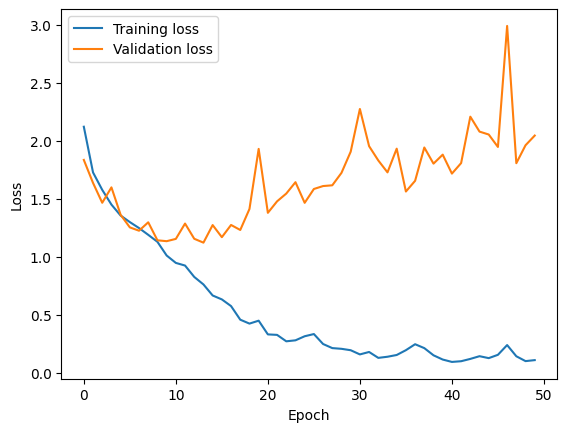

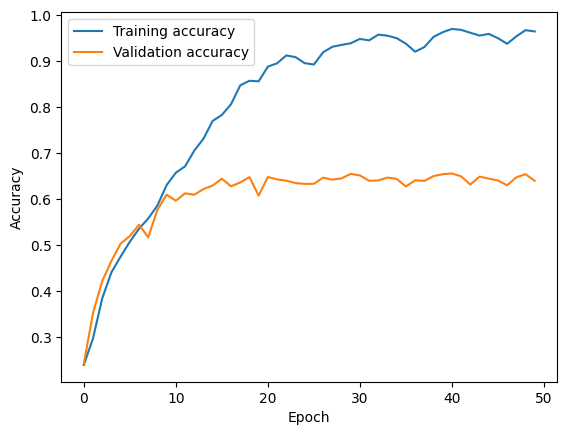

In [65]:
loss = emoticon_model_history.history['loss']
val_loss = emoticon_model_history.history['val_loss']
acc = emoticon_model_history.history['accuracy']
val_acc = emoticon_model_history.history['val_accuracy']

# Plot the training and validation loss curves
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy curves
plt.plot(acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Loaded model from disk
Found 7178 images belonging to 7 classes.


C:\Users\dhruv\AppData\Local\Temp\ipykernel_516\1061149618.py:32: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = emotion_model.predict_generator(test_generator)


-----------------------------------------------------------------
[[111  11 116 253 216 144 107]
 [ 14   0  12  32  25  19   9]
 [132  13 125 256 223 161 114]
 [208  16 236 457 381 274 202]
 [143  14 165 320 263 190 138]
 [117  10 147 340 290 198 145]
 [ 77  12 100 234 169 153  86]]


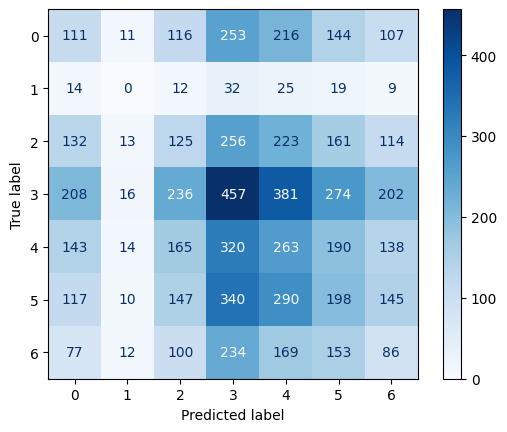

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.14      0.12      0.13       958
           1       0.00      0.00      0.00       111
           2       0.14      0.12      0.13      1024
           3       0.24      0.26      0.25      1774
           4       0.17      0.21      0.19      1233
           5       0.17      0.16      0.17      1247
           6       0.11      0.10      0.11       831

    accuracy                           0.17      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.17      0.17      7178



In [7]:

import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay


emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# load json and create model
json_file = open('local_emoticon_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("local_emoticon_model.h5")
print("Loaded model from disk")

# Initialize image data generator with rescaling
test_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
test_generator = test_data_gen.flow_from_directory(
        'test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# do prediction on test data
predictions = emotion_model.predict_generator(test_generator)

# see predictions
# for result in predictions:
#     max_index = int(np.argmax(result))
#     print(emotion_dict[max_index])

print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(test_generator.classes, predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print("-----------------------------------------------------------------")
print(classification_report(test_generator.classes, predictions.argmax(axis=1)))

# Training Model 3

In [19]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model

# shared parameters
params = {'kernel_size': 3, 'activation':'relu', 'padding':'same'}

# function for convolutional block
def conv_block(x, filters, pool):
    
    x = Conv2D(filters, **params)(x)
    
    x = BatchNormalization()(x)
    
    x = Conv2D(filters, **params)(x)
    
    x = BatchNormalization()(x)
    
    x = MaxPooling2D(pool_size = (pool,pool))(x)
    
    x = Dropout(0.5)(x) #increased dropout to 0.5
    
    return x 

In [22]:
# Creating a model using the conv_block
visible = Input(shape=(48,48,1), name= 'input')

x = conv_block(visible, 64, 2)

x = conv_block(x, 128, 2)

x = conv_block(x, 256, 2)

x = conv_block(x, 512, 2)

x = conv_block(x, 512, 2)

x = conv_block(x, 512, 1)

# x = conv_block(x, 1024, 1)

# x = conv_block(x, 1024, 1)


# Adding final layer
x = Flatten()(x)

x = Dense(4096, activation='relu')(x)

x = Dropout(0.5)(x)

# x = Dense(4096, activation='relu')(x)

# x = Dropout(0.5)(x)

output = Dense(7, activation='softmax')(x)

emotion_model_3 = Model(inputs=visible, outputs=output)

In [23]:
emotion_model_3.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_52 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_52 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_53 (Conv2D)          (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_53 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 24, 24, 64)       0   

In [24]:
emotion_model_3.compile(loss = 'categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=2e-3, decay=1e-6), metrics=['accuracy'])

In [28]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs=None):
        if logs is None:
            logs = {}
        if logs.get('accuracy') > 0.95:
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks=myCallback()

In [30]:
emoticon_model_history = emotion_model_3.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64,
        callbacks=[callbacks]
        )

Epoch 1/50
448/448 [==============================] - 887s 2s/step - loss: 2.8703 - accuracy: 0.1955 - val_loss: 2.0663 - val_accuracy: 0.2266
Epoch 2/50
448/448 [==============================] - 45s 100ms/step - loss: 1.9071 - accuracy: 0.2244 - val_loss: 1.8205 - val_accuracy: 0.2589
Epoch 3/50
448/448 [==============================] - 143s 319ms/step - loss: 1.8009 - accuracy: 0.2537 - val_loss: 1.7675 - val_accuracy: 0.2642
Epoch 4/50
448/448 [==============================] - 106s 237ms/step - loss: 1.7085 - accuracy: 0.3223 - val_loss: 1.6814 - val_accuracy: 0.3285
Epoch 5/50
448/448 [==============================] - 46s 102ms/step - loss: 1.5743 - accuracy: 0.3876 - val_loss: 1.5997 - val_accuracy: 0.3952
Epoch 6/50
448/448 [==============================] - 46s 103ms/step - loss: 1.4699 - accuracy: 0.4325 - val_loss: 1.3906 - val_accuracy: 0.4674
Epoch 7/50
448/448 [==============================] - 46s 103ms/step - loss: 1.3744 - accuracy: 0.4747 - val_loss: 1.2980 - val_ac

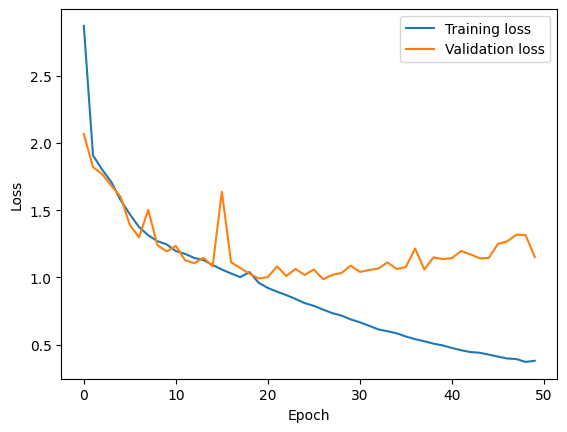

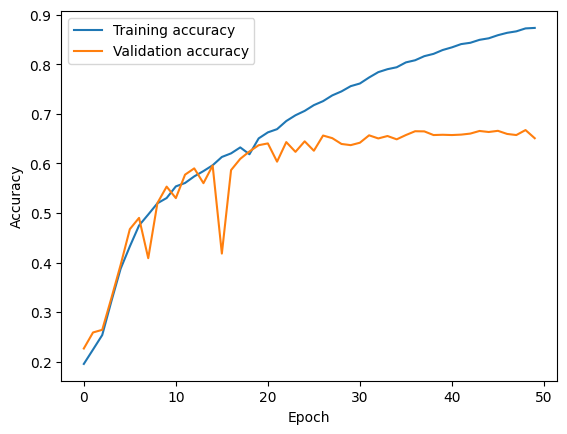

In [32]:
import matplotlib.pyplot as plt
loss = emoticon_model_history.history['loss']
val_loss = emoticon_model_history.history['val_loss']
acc = emoticon_model_history.history['accuracy']
val_acc = emoticon_model_history.history['val_accuracy']

# Plot the training and validation loss curves
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy curves
plt.plot(acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Training model 4 (Using VGG16)

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model

# shared parameters
params = {'kernel_size': 3, 'activation':'relu', 'padding':'same'}

# function for convolutional block
def conv_block(x, filters, pool):
    
    x = Conv2D(filters, **params)(x)
#     x = BatchNormalization()(x)
    x = Conv2D(filters, **params)(x)
    x = BatchNormalization()(x) 
    
    x = MaxPooling2D(pool_size = (pool,pool))(x)
    x = Dropout(0.5)(x) #increased dropout to 0.5
    
    return x 

In [5]:
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

In [53]:
base_model_vgg = tf.keras.applications.VGG16(input_shape=(48,48,3), include_top=False, weights="imagenet")

80134624/80134624 [==============================] - 5s 0us/step


In [54]:
# freezing layers
for layer in base_model_vgg.layers[:-4]:
    layer.trainable = False

In [85]:
model4 = Sequential()
model4.add(base_model_vgg)
model4.add(Dropout(0.5))

model4.add(Flatten())
model4.add(BatchNormalization())
model4.add(Dense(4096,kernel_initializer='he_uniform'))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Dropout(0.5))

model4.add(Dense(4096,kernel_initializer='he_uniform'))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Dropout(0.5))

model4.add(Dense(32,kernel_initializer='he_uniform'))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Dense(7,activation='softmax'))

In [86]:
model4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 dropout_21 (Dropout)        (None, 1, 1, 512)         0         
                                                                 
 flatten_7 (Flatten)         (None, 512)               0         
                                                                 
 batch_normalization_26 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_29 (Dense)            (None, 4096)              2101248   
                                                                 
 batch_normalization_27 (Bat  (None, 4096)             16384     
 chNormalization)                                     

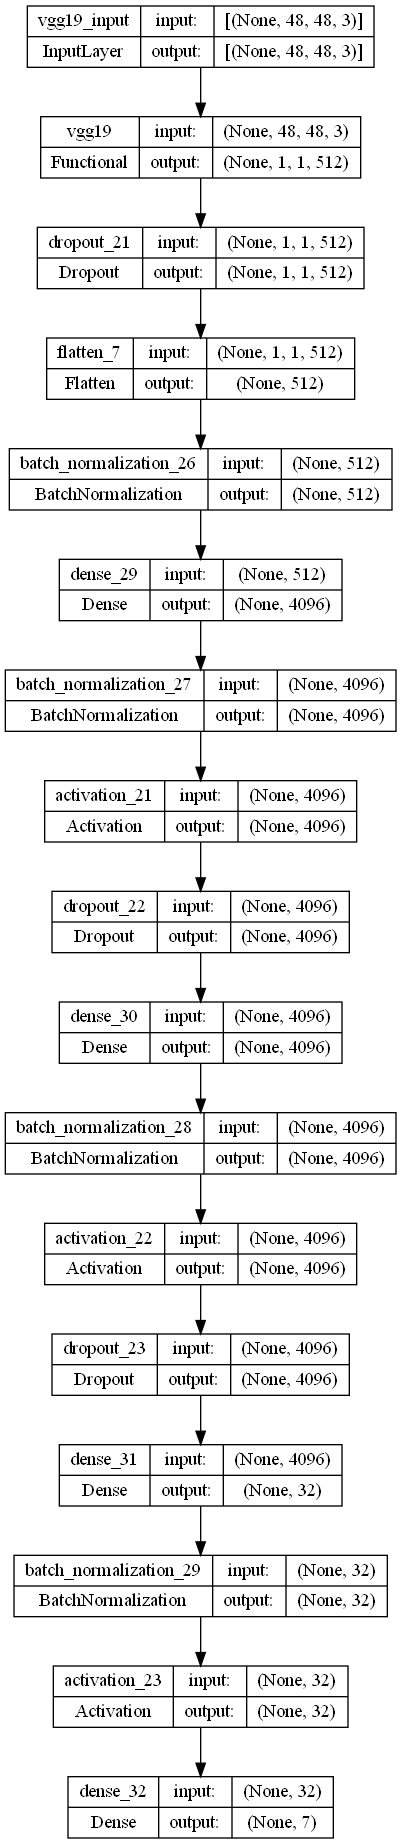

In [87]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(model4, to_file="VGG16.png", show_shapes=True, show_layer_names=True)
Image(filename="VGG16.png")

In [88]:
lrd = ReduceLROnPlateau(monitor='val_loss', patience=20, verbose=1, factor=0.50, min_lr=1e-10)

mcp = ModelCheckpoint('model_vgg.h5')

es = EarlyStopping(verbose=1, patience=20)

In [89]:
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-1), loss='categorical_crossentropy', metrics = ['accuracy'])

In [90]:
history_vgg = model4.fit(train_generator,
#                          steps_per_epoch=28709 // 64,
                         epochs=30,
                         validation_data=validation_generator,
#                          validation_steps=7178 // 64,
                         callbacks=[lrd, mcp, es],
                         verbose= 1)

Epoch 1/30
359/359 [==============================] - 31s 81ms/step - loss: 1.8298 - accuracy: 0.2397 - val_loss: 1.8156 - val_accuracy: 0.2472 - lr: 0.2000
Epoch 2/30
359/359 [==============================] - 29s 79ms/step - loss: 1.8238 - accuracy: 0.2411 - val_loss: 1.8180 - val_accuracy: 0.2472 - lr: 0.2000
Epoch 3/30
359/359 [==============================] - 29s 81ms/step - loss: 1.8214 - accuracy: 0.2436 - val_loss: 1.8350 - val_accuracy: 0.2472 - lr: 0.2000
Epoch 4/30
359/359 [==============================] - 29s 82ms/step - loss: 1.8229 - accuracy: 0.2428 - val_loss: 1.8254 - val_accuracy: 0.2472 - lr: 0.2000
Epoch 5/30
359/359 [==============================] - 33s 92ms/step - loss: 1.8239 - accuracy: 0.2432 - val_loss: 1.8217 - val_accuracy: 0.2472 - lr: 0.2000
Epoch 6/30
359/359 [==============================] - 32s 89ms/step - loss: 1.8234 - accuracy: 0.2442 - val_loss: 1.8219 - val_accuracy: 0.1718 - lr: 0.2000
Epoch 7/30
359/359 [==============================] - 31s 

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
loss = history_vgg.history['loss']
val_loss = history_vgg.history['val_loss']
acc = history_vgg.history['accuracy']
val_acc = history_vgg.history['val_accuracy']

# Plot the training and validation loss curves
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy curves
plt.plot(acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 5

In [111]:
num_classes = 7
epochs = 55
batch_size = 64
num_features = 32
width, height = 48,48

model = Sequential()
#Module1 conv<<conv<<batchnorm<<relu<<maxpooling<<dropout
model.add(Conv2D(2*num_features,kernel_size=(3,3),padding='same',data_format='channels_last',input_shape=(width, height, 1)))
model.add(Conv2D(2*num_features,kernel_size=(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(rate=0.2))
#Module2 conv<<conv<<batchnorm<<relu<<maxpool<<dropout
model.add(Conv2D(2*2*num_features,kernel_size=(3,3),padding='same'))
model.add(Conv2D(2*2*num_features,kernel_size=(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(rate=0.5))
#Module3 conv<<conv<<batchnorm<<relu<<maxpool<<dropout
model.add(Conv2D(2*2*2*num_features,kernel_size=(1,1),padding='same'))
model.add(Conv2D(2*2*2*num_features,kernel_size=(1,1),strides=(2,2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(rate=0.5))
#Module4 fc<<batchnorm<<fc<<batchnorm<<dropout<<softmax
model.add(Flatten())
model.add(Dense(units=4096))
model.add(BatchNormalization())
model.add(Dense(units=128))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999),metrics=['accuracy'])
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 conv2d_25 (Conv2D)          (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_40 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_30 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_32 (Dropout)        (None, 24, 24, 64)      

In [112]:
es = EarlyStopping(monitor='val_loss', patience = 10, mode = 'min', restore_best_weights=True)

history = model.fit(train_generator,validation_data = validation_generator,
                    batch_size=batch_size,epochs=15,
                    verbose=1,callbacks=[es],
                    shuffle=True)

# loss_and_metrics = model.evaluate(test_X,test_Y)

Epoch 1/15
359/359 [==============================] - 18s 48ms/step - loss: 2.2582 - accuracy: 0.1997 - val_loss: 1.8457 - val_accuracy: 0.2493
Epoch 2/15
359/359 [==============================] - 17s 47ms/step - loss: 1.9138 - accuracy: 0.2241 - val_loss: 1.8143 - val_accuracy: 0.2284
Epoch 3/15
359/359 [==============================] - 17s 48ms/step - loss: 1.8178 - accuracy: 0.2485 - val_loss: 1.7547 - val_accuracy: 0.2863
Epoch 4/15
359/359 [==============================] - 18s 51ms/step - loss: 1.7741 - accuracy: 0.2663 - val_loss: 1.8823 - val_accuracy: 0.2640
Epoch 5/15
359/359 [==============================] - 18s 51ms/step - loss: 1.7341 - accuracy: 0.2934 - val_loss: 1.7064 - val_accuracy: 0.3184
Epoch 6/15
359/359 [==============================] - 19s 52ms/step - loss: 1.7070 - accuracy: 0.3117 - val_loss: 1.9379 - val_accuracy: 0.2612
Epoch 7/15
359/359 [==============================] - 19s 53ms/step - loss: 1.6889 - accuracy: 0.3175 - val_loss: 1.8744 - val_accuracy:

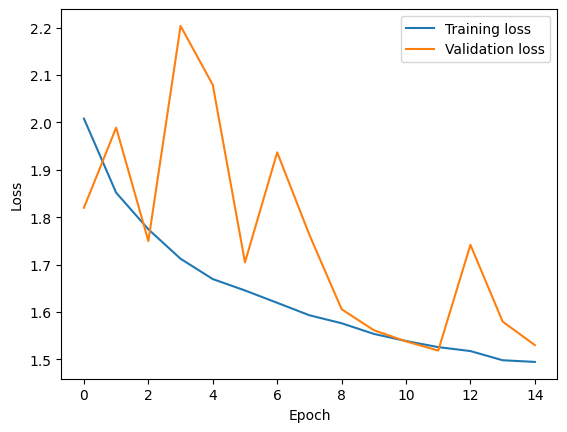

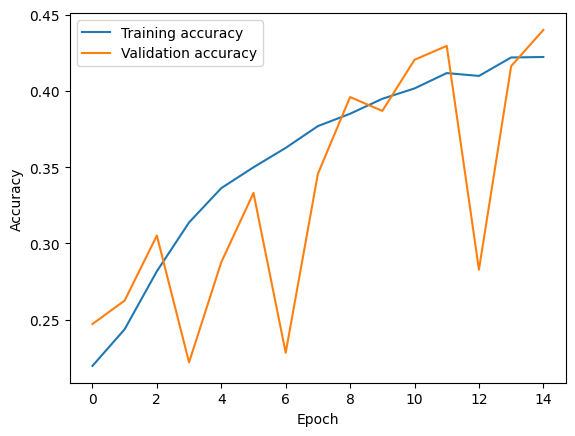

In [110]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation loss curves
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy curves
plt.plot(acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 6 (Improving model 3)

In [21]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model

# shared parameters
params = {'kernel_size': 3, 'activation':'relu', 'padding':'same'}

# function for convolutional block
def conv_block(x, filters, pool):
    
    x = Conv2D(filters, **params)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x) # Added another dropout layer
    x = Conv2D(filters, **params)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size = (pool,pool))(x)
    x = Dropout(0.5)(x) #increased dropout to 0.5
    
    return x 

In [37]:
# Creating a model using the conv_block
visible = Input(shape=(48,48,1), name= 'input')

x = conv_block(visible, 64, 2)
x = conv_block(x, 128, 2)
x = conv_block(x, 256, 2)
x = conv_block(x, 512, 2)
x = conv_block(x, 512, 2)
x = conv_block(x, 512, 1)

# x = conv_block(x, 1024, 1)
# x = conv_block(x, 1024, 1)


# Adding final layer
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.35)(x)

# x = Dense(32, activation='LeakyReLU')(x) # added 32 Dense neurons with leakyReLU 
# x = Dropout(0.5)(x)

output = Dense(7, activation='softmax')(x)
model6 = Model(inputs=visible, outputs=output)

In [38]:
model6.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_88 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_86 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 dropout_90 (Dropout)        (None, 48, 48, 64)        0         
                                                                 
 conv2d_89 (Conv2D)          (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_87 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                          

In [39]:
model6.compile(loss = 'categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])

In [40]:
from keras.callbacks import ModelCheckpoint
check_point = ModelCheckpoint('model6Best', 
                              monitor='val_acc', verbose=0, save_best_only=True,
                              save_weights_only=False, mode='auto', period=1)


history6 = model6.fit(
        train_generator,
#         steps_per_epoch=28709 // 64,
        epochs = 50,
        validation_data = validation_generator,
#         validation_steps=7178 // 64,
        callbacks=[check_point]
        )

Epoch 1/50
359/359 [==============================] - 39s 103ms/step - loss: 2.3250 - accuracy: 0.1969 - val_loss: 1.9385 - val_accuracy: 0.2472
Epoch 2/50
359/359 [==============================] - 37s 102ms/step - loss: 1.9602 - accuracy: 0.2189 - val_loss: 1.9355 - val_accuracy: 0.2172
Epoch 3/50
359/359 [==============================] - 37s 103ms/step - loss: 1.8542 - accuracy: 0.2322 - val_loss: 1.8575 - val_accuracy: 0.2179
Epoch 4/50
359/359 [==============================] - 38s 104ms/step - loss: 1.8026 - accuracy: 0.2516 - val_loss: 1.7832 - val_accuracy: 0.2668
Epoch 5/50
359/359 [==============================] - 37s 104ms/step - loss: 1.7620 - accuracy: 0.2785 - val_loss: 1.8697 - val_accuracy: 0.2870
Epoch 6/50
359/359 [==============================] - 38s 105ms/step - loss: 1.7043 - accuracy: 0.3118 - val_loss: 2.1377 - val_accuracy: 0.3115
Epoch 7/50
359/359 [==============================] - 37s 104ms/step - loss: 1.6335 - accuracy: 0.3552 - val_loss: 1.6657 - val_ac

359/359 [==============================] - 38s 106ms/step - loss: 1.2628 - accuracy: 0.5288 - val_loss: 1.2368 - val_accuracy: 0.5272
Epoch 28/50
359/359 [==============================] - 38s 106ms/step - loss: 1.2628 - accuracy: 0.5263 - val_loss: 1.1816 - val_accuracy: 0.5468
Epoch 29/50
359/359 [==============================] - 38s 106ms/step - loss: 1.2544 - accuracy: 0.5313 - val_loss: 1.1536 - val_accuracy: 0.5573
Epoch 30/50
359/359 [==============================] - 38s 105ms/step - loss: 1.2342 - accuracy: 0.5359 - val_loss: 1.1495 - val_accuracy: 0.5775
Epoch 31/50
359/359 [==============================] - 38s 106ms/step - loss: 1.2303 - accuracy: 0.5389 - val_loss: 1.1833 - val_accuracy: 0.5677
Epoch 32/50
359/359 [==============================] - 38s 105ms/step - loss: 1.2257 - accuracy: 0.5413 - val_loss: 1.1146 - val_accuracy: 0.5712
Epoch 33/50
359/359 [==============================] - 38s 106ms/step - loss: 1.2238 - accuracy: 0.5411 - val_loss: 1.0561 - val_accurac

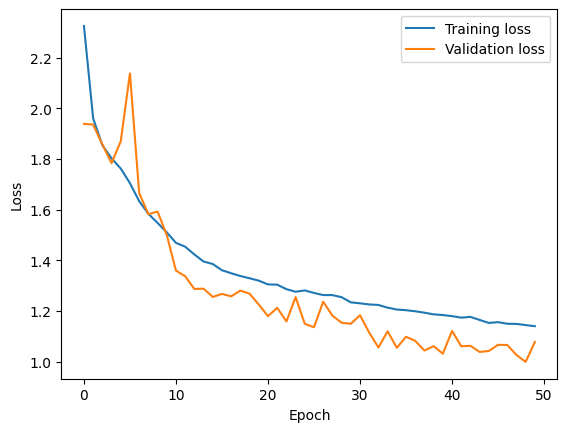

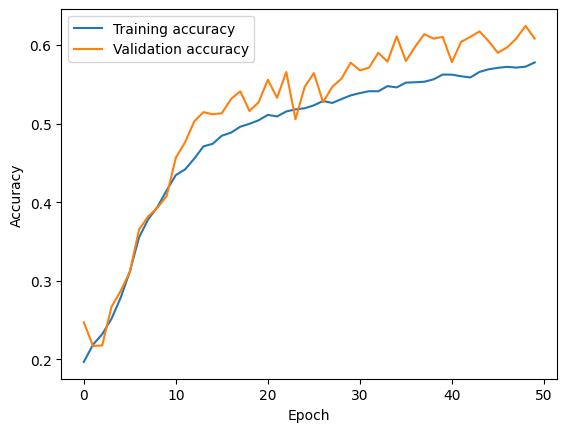

In [43]:
import matplotlib.pyplot as plt

loss = history6.history['loss']
val_loss = history6.history['val_loss']
acc = history6.history['accuracy']
val_acc = history6.history['val_accuracy']

# Plot the training and validation loss curves
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy curves
plt.plot(acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [44]:
# saving the model
import json
model_json = model6.to_json()

with open("model6.json","w") as json_file:
  json_file.write(model_json)


# save trained model weights in .h5 file
model6.save_weights('model6.h5')

In [45]:
tf.keras.models.save_model(model6,'model6i.h5')

In [36]:
from keras.models import load_model
model6_2 = load_model('model6i.h5')

history6_2 = model6_2.fit(train_generator, 
                          epochs = 1,
                          validation_data = validation_generator,
#                           callbacks=[callbacks]
                         )

Epoch 1/30
359/359 [==============================] - 40s 108ms/step - loss: 1.2169 - accuracy: 0.5569 - val_loss: 1.0435 - val_accuracy: 0.5985
Epoch 2/30
359/359 [==============================] - 38s 105ms/step - loss: 1.2060 - accuracy: 0.5565 - val_loss: 1.0935 - val_accuracy: 0.5950
Epoch 3/30
359/359 [==============================] - 38s 105ms/step - loss: 1.2001 - accuracy: 0.5616 - val_loss: 1.0650 - val_accuracy: 0.6013
Epoch 4/30
359/359 [==============================] - 38s 105ms/step - loss: 1.2050 - accuracy: 0.5603 - val_loss: 1.1290 - val_accuracy: 0.5873
Epoch 5/30
359/359 [==============================] - 38s 105ms/step - loss: 1.2027 - accuracy: 0.5625 - val_loss: 1.0700 - val_accuracy: 0.5845
Epoch 6/30
359/359 [==============================] - 38s 106ms/step - loss: 1.2009 - accuracy: 0.5622 - val_loss: 1.1415 - val_accuracy: 0.5670
Epoch 7/30
359/359 [==============================] - 38s 106ms/step - loss: 1.1977 - accuracy: 0.5604 - val_loss: 1.0276 - val_ac

KeyboardInterrupt: 

In [50]:
model6.evaluate(validation_generator)

23/23 [==============================] - 1s 30ms/step - loss: 1.0777 - accuracy: 0.6082


[1.0776578187942505, 0.6082402467727661]

# Model 7 (removing variance limiters)

In [92]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model

# shared parameters
params = {'kernel_size': 3, 'activation':'relu', 'padding':'same'}

# function for convolutional block
def conv_block(x, filters, pool):
    
    x = Conv2D(filters, **params)(x)
    x = BatchNormalization()(x)

    x = Conv2D(filters, **params)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size = (pool,pool))(x)
    
    x = Dropout(0.5)(x) #increased dropout to 0.5
    
    return x 

In [99]:
# Creating a model using the conv_block
visible = Input(shape=(48,48,1), name= 'input')

x = conv_block(visible, 64, 2)
x = conv_block(x, 128, 2)

x = conv_block(x, 256, 2)

x = conv_block(x, 512, 2)
x = conv_block(x, 512, 2)
x = conv_block(x, 512, 1)
x = conv_block(x, 512, 1)
# x = conv_block(x, 1024, 1)
# x = conv_block(x, 1024, 1)


# Adding final layer
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.35)(x)

# x = Dense(4096, activation='relu')(x) # added 32 Dense neurons with leakyReLU 
# x = Dropout(0.5)(x)

output = Dense(7, activation='softmax')(x)
model7 = Model(inputs=visible, outputs=output)

ResourceExhaustedError: {{function_node __wrapped__StatelessRandomUniformV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[3,3,256,512] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:StatelessRandomUniformV2]

In [ ]:
model7.summary()

In [95]:
model7.compile(loss = 'categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=3e-3, beta_1=1e-3), metrics=['accuracy'])

In [97]:
from keras.callbacks import ModelCheckpoint
check_point = ModelCheckpoint('model7Best', 
                              monitor='val_acc', verbose=0, save_best_only=True,
                              save_weights_only=False, mode='auto', period=1)


history6 = model7.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs = 50,
        validation_data = validation_generator,
        validation_steps=7178 // 64,
        callbacks=[check_point]
        )

Epoch 1/50


ResourceExhaustedError: Graph execution error:

Detected at node 'model_15/batch_normalization_307/FusedBatchNormV3' defined at (most recent call last):
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "C:\Users\dhruv\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\asyncio\base_events.py", line 1906, in _run_once
      handle._run()
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\dhruv\AppData\Local\Temp\ipykernel_17752\430454518.py", line 7, in <module>
      history6 = model7.fit(
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 850, in call
      outputs = self._fused_batch_norm(inputs, training=training)
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 660, in _fused_batch_norm
      output, mean, variance = control_flow_util.smart_cond(
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\keras\utils\control_flow_util.py", line 108, in smart_cond
      return tf.__internal__.smart_cond.smart_cond(
    File "C:\Users\dhruv\miniconda3\envs\YOLO\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 634, in _fused_batch_norm_training
      return tf.compat.v1.nn.fused_batch_norm(
Node: 'model_15/batch_normalization_307/FusedBatchNormV3'
OOM when allocating tensor with shape[64,64,48,48] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model_15/batch_normalization_307/FusedBatchNormV3}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_244799]

In [62]:
import keras